In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

In [20]:
# Load the student dataset
df = pd.read_csv('student_dataset.csv')

In [21]:

# Calculate BMI (Body Mass Index) for each student
df['BMI'] = df['Weight (kg)'] / ((df['Height (cm)'] / 100) ** 2)

# Classify students into different BMI categories
# BMI Categories: Underweight (< 18.5), Normal (18.5 - 24.9), Overweight (25 - 29.9), Obese (>= 30)
def classify_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'


In [22]:
df['BMI Category'] = df['BMI'].apply(classify_bmi_category)

# Display the dataset with BMI categories
print(df)

                      Name  Class  Roll No  Age  Weight (kg)  Height (cm)  \
0           Gabrielle Cole      7     4369   18           46          186   
1          Melissa Stevens      7     6553   20           40          187   
2              Daniel Leon      3     4376   17           41          168   
3           Brenda Frazier      2     2381   18           44          177   
4        Natalie Alexander     10     5917   16           76          179   
5             Melissa Park      1     3018   20           89          185   
6              Lisa Hansen     10     9240   20           78          170   
7            Sandra Morris     11     2118   18           40          199   
8               Brady Sims      9     9861   20           42          167   
9               Joann Gray      5     8417   19           69          152   
10          Edward Wheeler     12     6360   19           97          193   
11           Tammy Higgins      9     5101   20           94          173   

In [23]:
# Create crisp sets for each BMI category containing student names
obese_students = df.loc[df['BMI Category'] == 'Obese', 'Name']
overweight_students = df.loc[df['BMI Category'] == 'Overweight', 'Name']
normal_students = df.loc[df['BMI Category'] == 'Normal', 'Name']
underweight_students = df.loc[df['BMI Category'] == 'Underweight', 'Name']

# Convert each crisp set to a dataset
obese_dataset = pd.DataFrame({'Obese Students': obese_students})
overweight_dataset = pd.DataFrame({'Overweight Students': overweight_students})
normal_dataset = pd.DataFrame({'Normal Students': normal_students})
underweight_dataset = pd.DataFrame({'Underweight Students': underweight_students})

# Concatenate the series for each BMI category into a single DataFrame
all_categories_dataset = pd.concat([obese_students, overweight_students, normal_students, underweight_students], axis=1)

# Print the first few rows of the combined dataset
print("Combined Dataset for all BMI Categories:")
print(all_categories_dataset)



Combined Dataset for all BMI Categories:
                Name             Name                    Name  \
11     Tammy Higgins              NaN                     NaN   
20  Richard Bradford              NaN                     NaN   
34      Lacey Miller              NaN                     NaN   
38        Anna Lewis              NaN                     NaN   
41  Katherine Miller              NaN                     NaN   
49     Eric Mcknight              NaN                     NaN   
5                NaN     Melissa Park                     NaN   
6                NaN      Lisa Hansen                     NaN   
9                NaN       Joann Gray                     NaN   
10               NaN   Edward Wheeler                     NaN   
17               NaN    Gregory Weber                     NaN   
21               NaN    Karen Stanton                     NaN   
26               NaN  Charles Jenkins                     NaN   
37               NaN   Rebecca Powers            

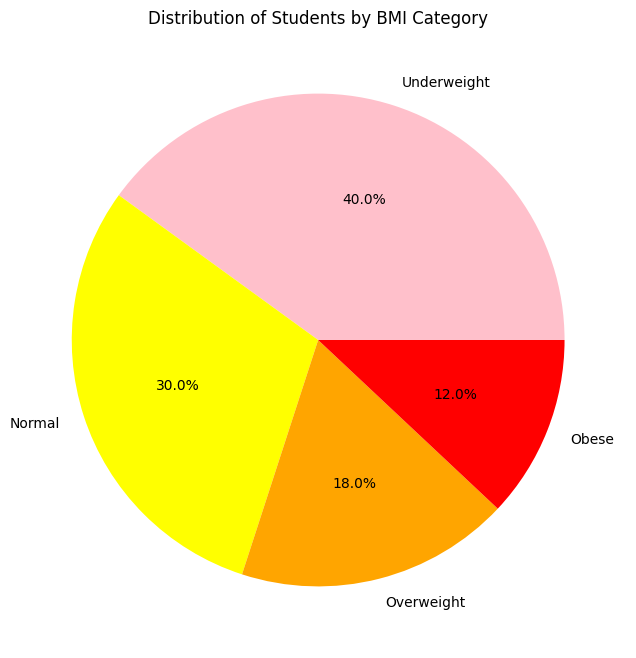

In [24]:
# Count the number of students in each BMI category
bmi_category_counts = df['BMI Category'].value_counts()

# Define colors for the pie chart
colors = ['pink', 'yellow', 'orange', 'red']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Students by BMI Category')
plt.show()

